# 01 SRI per protocol

In [1]:
import re
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the CSV files

In [2]:
raw_data = sqlContext.read.parquet('../data/sri/2019-09/reports/06_sri_per_protocol_from_host').toPandas()
raw_data

,protocol,sri
0,https,137091681
1,http,3490726


## Prepare the data

In [3]:
data = raw_data.copy()
data['percentage'] = data['sri'] / data['sri'].sum() * 100
data = data.set_index('protocol')
data

,sri,percentage
protocol,,
https,137091681,97.516954
http,3490726,2.483046


## Plot the data

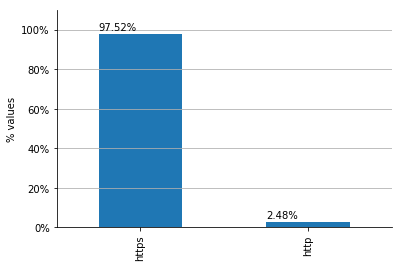

In [4]:
fig, ax = plt.subplots(1, 1)
data['percentage'].plot.bar(ax=ax, sharex=True, rot='xticks')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

for i, v in enumerate(data['percentage']):
    ax.text(i-0.25, v + 2, '{:.2f}%'.format(v))

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])
    
plt.xticks(rotation=90)
plt.ylim(0,110)

plt.xlabel('')
plt.ylabel('% values')
plt.savefig('06_sri_per_resolved_protocol.pdf', bbox_inches='tight')